In [80]:
import pandas as pd 
import numpy as np
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math

In [81]:
def merge_left_right(data1,data2):
    print(len(data1),len(data2))
    temp_data = data1.append(data2,ignore_index=True)
    return temp_data

def merg_sort(list_data):
    list_length = len(list_data)
    if list_length == 1:
        output = list_data[0][2]
        return output
    else:
        mid_point = math.floor(list_length/2)
        #print(len(list_data[:mid_point]))
        left = list_data[mid_point:]
        right = list_data[:mid_point]
        return merge_left_right(merg_sort(left), merg_sort(right))

In [82]:
data = pd.read_csv('Security_and_market_movement_unscaled_cluster_2019-02-28.csv')

In [83]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [84]:
data.head()

,SecurityID,KeyDate,YieldWorst,ModifiedDuration_Plain,AmtOutstanding,Target_G_change,Group,G_change,skew_change,swap_change,vix_change,Close_change,slope_change,skew_change_Weekly,swap_change_Weekly,vix_change_Weekly,Close_change_Weekly,slope_change_Weekly
0,56535,2019-01-02,26.9747,1.85247,300000000.0,0.002132,Cluster 10,0.014612,-0.004584,-0.004966,-0.086546,0.001269,-0.238095,0.000000,0.0,0.00000,0.000000,-0.026617
1,56535,2019-01-03,26.7432,1.84797,300000000.0,-0.005914,Cluster 10,0.007046,-0.042981,0.000000,0.096038,-0.024757,0.062500,0.000000,0.0,0.00000,0.000000,-0.024643
2,56535,2019-01-04,26.9556,1.84352,300000000.0,0.006400,Cluster 10,0.017257,-0.006951,-0.012668,-0.159921,0.034336,0.000000,0.000000,0.0,0.00000,0.000000,-0.034643
3,56535,2019-01-07,27.0412,1.84036,300000000.0,-0.001467,Cluster 10,-0.045289,0.019024,0.005443,0.000935,0.007010,0.000000,0.000000,0.0,0.00000,0.000000,-0.025119
4,56535,2019-01-08,26.9041,1.83947,300000000.0,-0.007478,Cluster 10,-0.005836,0.015322,0.020495,-0.043458,0.009695,-0.117647,-0.004034,0.0,-0.03859,0.005511,-0.058648


In [85]:
data_1 = data.drop(columns = ['skew_change_Weekly','swap_change_Weekly','vix_change_Weekly','Close_change_Weekly','slope_change_Weekly','AmtOutstanding'])
data_1 = data_1[data_1['Group'] == 'Cluster 0']
data_1.drop(columns = ['Group'],inplace=True)

In [86]:
data_1.loc[:,'YieldWorst':'slope_change']

,YieldWorst,ModifiedDuration_Plain,Target_G_change,G_change,skew_change,swap_change,vix_change,Close_change,slope_change
80,7.05424,6.64285,0.025246,0.017571,-0.004584,-0.004966,-0.086546,0.001269,-0.238095
81,6.87398,6.65456,-0.023730,0.013655,-0.042981,0.000000,0.096038,-0.024757,0.062500
82,6.47403,6.69407,-0.103915,0.007753,-0.006951,-0.012668,-0.159921,0.034336,0.000000
83,6.28284,6.71163,-0.073425,-0.058599,0.019024,0.005443,0.000935,0.007010,0.000000
84,6.07889,6.73048,-0.065475,-0.019375,0.015322,0.020495,-0.043458,0.009695,-0.117647
...,...,...,...,...,...,...,...,...,...
504742,4.19661,6.62624,-0.010783,0.005731,-0.010946,-0.011223,-0.065699,0.006411,0.062500
504743,4.20100,6.62331,-0.003177,-0.004665,0.054427,-0.000783,0.099186,0.001232,-0.058824
504744,4.16937,6.62331,-0.004249,-0.001123,-0.016762,-0.012534,0.021549,-0.000790,0.000000
504745,4.22929,6.72373,0.005710,-0.001138,0.007249,0.005553,-0.030982,-0.000544,0.187500


In [87]:
final_data = data_1.groupby('SecurityID')
###create a list of bond with data
bonds_list = [final_data.get_group(x) for x in final_data.groups]

In [88]:
bond_1 = bonds_list[5]

In [89]:
dummy_variable = pd.read_csv('Security_info_post_dummy.csv')

In [90]:
dummy_variable.drop(columns=['Unnamed: 0'],inplace=True)

In [91]:
dummy_variable.head()

,SecurityID,1.5 Lien Secured,1st Lien Secured,1st lien,2nd Lien Secured,3rd Lien Secured,Asset Backed,Jr Subordinated Unsecured,Secured,Sr Unsecured,...,FLOATING,FUNGED,Fixed,PAY-IN-KIND,STEP CPN,VARIABLE,WHEN ISSUED,ZERO COUPON,MinIncrement,MinPiece
0,62,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1000.0,50000.0
1,64,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1000.0,2000.0
2,69,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,100000.0,100000.0
3,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1000.0,2000.0
4,78,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1000.0,150000.0


In [92]:
factor_ratio = 0.8
data_1 = bond_1.iloc[:round(len(bond_1)*factor_ratio)]
data_2 = bond_1.iloc[round(len(bond_1)*factor_ratio):]

### Feature engineering construct the retrun

In [93]:
training_set = data_1.iloc[:,2:].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [94]:
data_1.iloc[:,2:].head()

,YieldWorst,ModifiedDuration_Plain,Target_G_change,G_change,skew_change,swap_change,vix_change,Close_change,slope_change
502107,4.41893,4.43966,0.035109,0.017571,-0.004584,-0.004966,-0.086546,0.001269,-0.238095
502108,4.42611,4.43151,0.054524,0.013655,-0.042981,0.000000,0.096038,-0.024757,0.062500
502109,4.62312,4.42192,0.064087,0.007753,-0.006951,-0.012668,-0.159921,0.034336,0.000000
502110,4.62460,4.41925,-0.051591,-0.058599,0.019024,0.005443,0.000935,0.007010,0.000000
502111,4.66780,4.48630,0.000623,-0.019375,0.015322,0.020495,-0.043458,0.009695,-0.117647


In [95]:
bond_1.head()

,SecurityID,KeyDate,YieldWorst,ModifiedDuration_Plain,Target_G_change,G_change,skew_change,swap_change,vix_change,Close_change,slope_change
502107,1858,2019-01-02,4.41893,4.43966,0.035109,0.017571,-0.004584,-0.004966,-0.086546,0.001269,-0.238095
502108,1858,2019-01-03,4.42611,4.43151,0.054524,0.013655,-0.042981,0.000000,0.096038,-0.024757,0.062500
502109,1858,2019-01-04,4.62312,4.42192,0.064087,0.007753,-0.006951,-0.012668,-0.159921,0.034336,0.000000
502110,1858,2019-01-07,4.62460,4.41925,-0.051591,-0.058599,0.019024,0.005443,0.000935,0.007010,0.000000
502111,1858,2019-01-08,4.66780,4.48630,0.000623,-0.019375,0.015322,0.020495,-0.043458,0.009695,-0.117647


In [96]:
X = []
y = []
for i in range(3, len(training_set_scaled)):
    X.append(training_set_scaled[i-3:i])
    y.append(training_set_scaled[i,2])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 9))

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

hidden_layer_sizes = [200,300,300,200,100]
def build_model(hidden_layer_sizes,act,input_d):
  model = Sequential()

  model.add(LSTM(units = hidden_layer_sizes[0], activation= act,return_sequences= True, input_shape =input_d))
  model.add(Dropout(0.2))

  for layer_size in hidden_layer_sizes[1:len(hidden_layer_sizes)-1]:
    model.add(LSTM(units =layer_size, activation = act, return_sequences=True))
    model.add(Dropout(0.3))

  model.add(LSTM(units=hidden_layer_sizes[len(hidden_layer_sizes)-1], activation=act))
  model.add(Dropout(0.2))

  model.add(Dense(units=100))
  model.add(Dense(units=25))
  model.add(Dense(units=1,activation=act))

  model.compile(optimizer='adam', loss='mean_squared_error')
  return model




regressor = build_model(hidden_layer_sizes,"relu",(X.shape[1],9))

Epoch 1/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0397
Epoch 2/30
3/3 [==============================] - 0s 12ms/step - loss: 0.0375
Epoch 3/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0395
Epoch 4/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0379
Epoch 5/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 6/30
3/3 [==============================] - 0s 12ms/step - loss: 0.0398
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0399
Epoch 8/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0381
Epoch 9/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0388
Epoch 10/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0393
Epoch 11/30
3/3 [==============================] - 0s 10ms/step - loss: 0.0380
Epoch 12/30
3/3 [==============================] - 0s 11ms/step - loss: 0.0394
Epoch 13/30
3/3 [==============================] - 0s 11ms/st

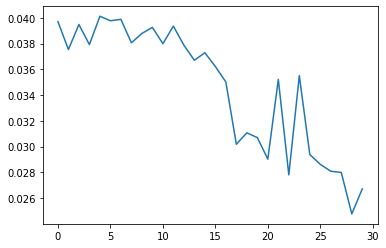

In [101]:
model = regressor.fit(X, y, epochs = 30, batch_size = 10)
plt.plot(model.history['loss'])
plt.show()

In [102]:
###
real_stock_price = data_2.iloc[:,4:5].values

dataset_total = bond_1.iloc[:,2:]
inputs = dataset_total[len(dataset_total) - len(data_2) - 3:].values
#inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

X_test = []
for i in range(3, len(inputs)):
    X_test.append(inputs[i-3:i])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 9))
predicted_stock_price= regressor.predict(X_test)
sc.fit_transform(real_stock_price)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price = pd.DataFrame(predicted_stock_price,columns=['Credit Spread Change'])
predicted_stock_price.reset_index(inplace=True)
predicted_stock_price = predicted_stock_price[['Credit Spread Change']]
data_test = data[round(len(data)*factor_ratio):]
data_test.reset_index(inplace=True)

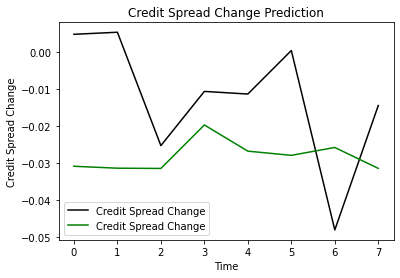

In [103]:
plt.plot(real_stock_price, color = 'black', label = 'Credit Spread Change')
plt.plot(predicted_stock_price['Credit Spread Change'], color = 'green', label = 'Credit Spread Change')
plt.title('Credit Spread Change Prediction')
plt.xlabel('Time')
plt.ylabel('Credit Spread Change')
plt.legend()
plt.show()